In [ ]:
import pandas as pd
tes = pd.read_csv('test.tsv',sep = '\t')
latih = pd.read_csv('train.tsv',sep = '\t')
sub = pd.read_csv('sampleSubmission.csv', sep = '\t')

In [ ]:
tes

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
latih

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PhraseId,Sentiment  66292 non-null  object
dtypes: object(1)
memory usage: 518.0+ KB


In [ ]:
latih_ = latih[['Phrase','Sentiment']]

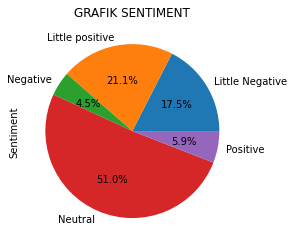

In [ ]:
pie = latih_['Sentiment'].replace(0,'Negative').replace(1,'Little Negative').replace(2,'Neutral').replace(3,'Little positive').replace(4,'Positive').value_counts().sort_index()
pie.plot(kind='pie', title='GRAFIK SENTIMENT', autopct='%1.1f%%')

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from keras.preprocessing.text import text_to_word_sequence

def tokeNstem(text):
    text=str(text)
    text = text.replace("'","")
    tokenizing = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ")
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenizing if not i in stop_words]
    stopwordremove_text = ' '.join(stopwordremove)
    numRem = ''.join(num for num in stopwordremove_text if not num.isdigit())
    stemmer = PorterStemmer()
    stem_input = nltk.word_tokenize(numRem)
    stem_output = ' '.join([stemmer.stem(word) for word in stem_input])
    return stem_output

In [ ]:
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
latih_['Phrase'] = latih_['Phrase'].apply(tokeNstem)

<ipython-input-36-f4020d291dcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latih_['Phrase'] = latih_['Phrase'].apply(tokeNstem)


In [ ]:
latih_.head(10)

,Phrase,Sentiment
0,seri escapad demonstr adag good goos also good...,1
1,seri escapad demonstr adag good goos,2
2,seri,2
3,,2
4,seri,2
5,escapad demonstr adag good goos,2
6,,2
7,escapad demonstr adag good goos,2
8,escapad,2
9,demonstr adag good goos,2


In [ ]:
latih_['Phrase'].replace('',inplace =True)
latih_.dropna(subset = ['Phrase'],inplace =True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
latih_.head(10)

,Phrase,Sentiment
0,seri escapad demonstr adag good goos also good...,1
1,seri escapad demonstr adag good goos,2
2,seri,2
3,seri,2
4,seri,2
5,escapad demonstr adag good goos,2
6,escapad demonstr adag good goos,2
7,escapad demonstr adag good goos,2
8,escapad,2
9,demonstr adag good goos,2


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(latih_['Phrase'],latih_['Sentiment'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trainx_vect = vectorizer.fit_transform(train_x)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline([('tfidf', TfidfVectorizer()),('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),])
knn.fit(train_x, train_y)
test_predx = knn.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(test_predx)
akurasi =accuracy_score(test_predx, test_y)
print("akurasi:",akurasi)
report = classification_report(test_predx,test_y)
print(report)

[2 2 2 ... 2 2 2]
akurasi: 0.6125208253235935
              precision    recall  f1-score   support

           0       0.38      0.42      0.40      1280
           1       0.48      0.50      0.49      5319
           2       0.80      0.67      0.73     18566
           3       0.43      0.56      0.48      5120
           4       0.28      0.57      0.37       927

    accuracy                           0.61     31212
   macro avg       0.47      0.54      0.50     31212
weighted avg       0.65      0.61      0.63     31212

